## Model Performance on Indian Language

#BLEU-Score analysis overall

In [1]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - final_sheet.csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.008389
Gemini      0.010220
Mistral     0.009295
Abhishek    0.011723
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.008389
1    Gemini  0.010220
2   Mistral  0.009295
3  Abhishek  0.011723

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.112108
Gemini      0.096139
Mistral     0.113053
Abhishek    0.119863
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.016114
Gemini      0.019805
Mistral     0.018538
Abhishek    0.021873
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.004148
Gemini      0.005906
Mistral     0.005054
Abhishek    0.006492
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.001475
Gemini      0.002207
Mistral     0.002069
Abhishek    0.002254
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.112108  0.016114  0.004148  0.001475
1    Gemini  0.096139  0.019805  0.005906  0.002207
2   Mistral  0.113053  0.018538

#ROUGE CALCULATION OVERALL

In [2]:
!pip install rouge

In [46]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/final.csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.148040
Gemini      0.150990
Mistral     0.148379
Abhishek    0.164408
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.023154
Gemini      0.031553
Mistral     0.027897
Abhishek    0.032084
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.129694
Gemini      0.131082
Mistral     0.124493
Abhishek    0.138363
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.148040  0.023154  0.129694
1    Gemini  0.150990  0.031553  0.131082
2   Mistral  0.148379  0.027897  0.124493
3  Abhishek  0.164408  0.032084  0.138363


#METEOR score overall

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Average METEOR Scores:
ChatGPT     0.094881
Gemini      0.101401
Mistral     0.095327
Abhishek    0.105563
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.094881
1    Gemini  0.101401
2   Mistral  0.095327
3  Abhishek  0.105563
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

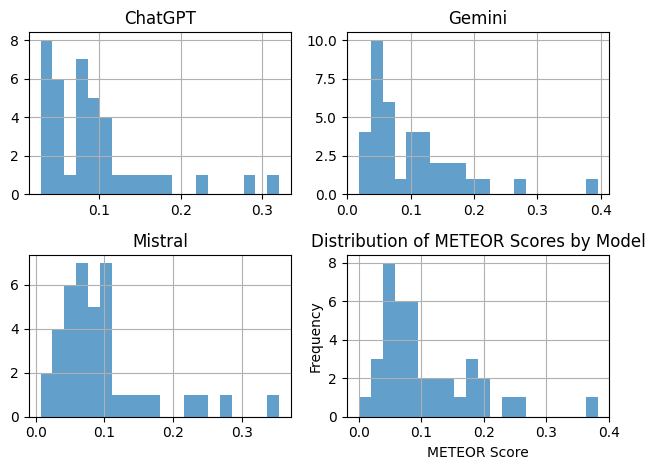

In [10]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - final_sheet.csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#overall BERT score

In [2]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Processing ChatGPT...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 1/3 for ChatGPT


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 2/3 for ChatGPT


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 3/3 for ChatGPT
Processing Gemini...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 1/3 for Gemini


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 2/3 for Gemini


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 3/3 for Gemini
Processing Mistral...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 1/3 for Mistral


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 2/3 for Mistral


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 3/3 for Mistral
Processing Abhishek...


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 1/3 for Abhishek


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 2/3 for Abhishek


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Processed batch 3/3 for Abhishek

Average BERTScore Precision:
ChatGPT     0.928794
Gemini      0.930697
Mistral     0.931068
Abhishek    0.929056
dtype: float64

Average BERTScore Recall:
ChatGPT     0.929954
Gemini      0.931142
Mistral     0.930399
Abhishek    0.929844
dtype: float64

Average BERTScore F1:
ChatGPT     0.929371
Gemini      0.930917
Mistral     0.930730
Abhishek    0.929446
dtype: float64

BERTScore Summary:
      Model  Precision    Recall        F1
0   ChatGPT   0.928794  0.929954  0.929371
1    Gemini   0.930697  0.931142  0.930917
2   Mistral   0.931068  0.930399  0.930730
3  Abhishek   0.929056  0.929844  0.929446
F1 score distribution plot saved as 'bertscore_f1_distribution.png'
Comparison chart saved as 'bertscore_comparison.png'


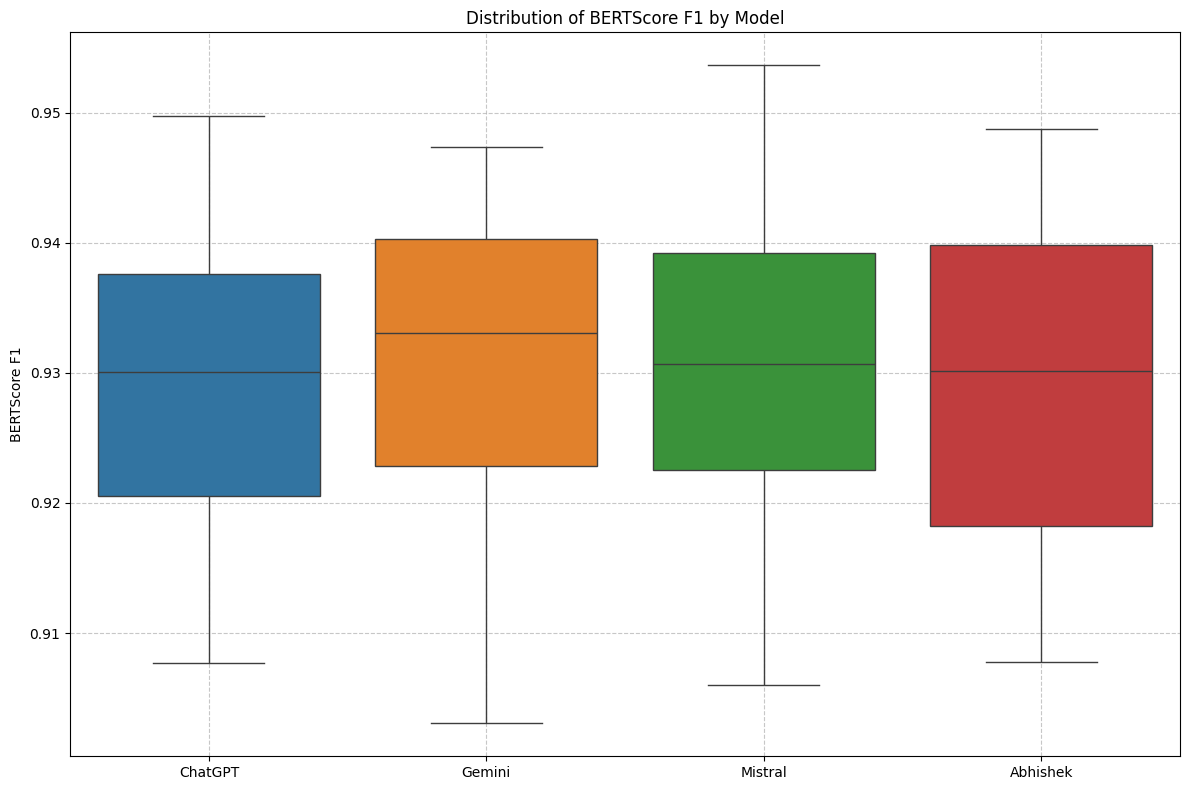

<Figure size 1000x600 with 0 Axes>

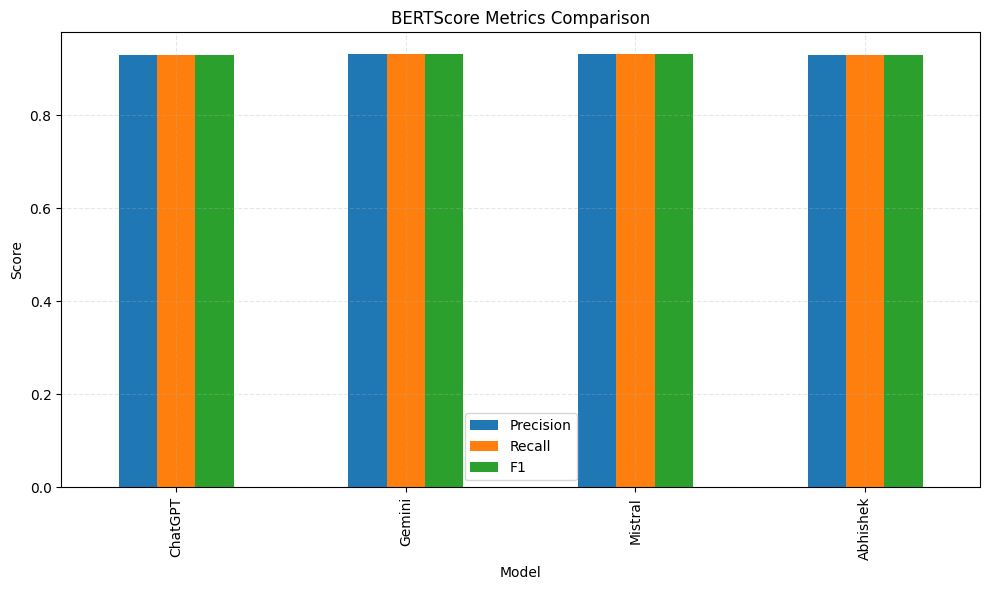

In [3]:
import pandas as pd
from bert_score import score

# Load the CSV file
df = pd.read_csv("/content/response_sheet - final_sheet.csv")  # Replace with your actual file path

# Initialize BERTScore storage with correct key names
bert_scores = {
    "ChatGPT": {"precision": [], "recall": [], "f1": []},
    "Gemini": {"precision": [], "recall": [], "f1": []},
    "Mistral": {"precision": [], "recall": [], "f1": []},
    "Abhishek": {"precision": [], "recall": [], "f1": []}
}

# Process batches of data to compute BERTScore efficiently
batch_size = 16  # Adjust based on your memory constraints

for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
    # Map model name to dictionary key
    model_name = model.replace("answer_model_", "").title()
    if model_name == "Chatgpt":
        model_name = "ChatGPT"

    print(f"Processing {model_name}...")

    # Prepare data
    candidates = []
    references = []
    valid_indices = []

    for idx, row in df.iterrows():
        reference = str(row["reference_answer"]).strip()
        candidate = str(row[model]).strip()

        # Skip empty texts
        if len(reference) == 0 or len(candidate) == 0:
            continue

        candidates.append(candidate)
        references.append(reference)
        valid_indices.append(idx)

    # Process in batches
    for i in range(0, len(candidates), batch_size):
        batch_candidates = candidates[i:i+batch_size]
        batch_references = references[i:i+batch_size]

        try:
            # Calculate BERTScore
            P, R, F1 = score(batch_candidates, batch_references, lang="en", verbose=False)

            # Store scores
            for j in range(len(batch_candidates)):
                bert_scores[model_name]["precision"].append(P[j].item())
                bert_scores[model_name]["recall"].append(R[j].item())
                bert_scores[model_name]["f1"].append(F1[j].item())

            # Progress update
            print(f"Processed batch {i//batch_size + 1}/{(len(candidates) + batch_size - 1)//batch_size} for {model_name}")

        except Exception as e:
            print(f"Error computing BERTScore for batch starting at index {i}: {e}")
            continue

# Create DataFrames for each BERTScore metric
precision_df = pd.DataFrame({model: scores["precision"] for model, scores in bert_scores.items()})
recall_df = pd.DataFrame({model: scores["recall"] for model, scores in bert_scores.items()})
f1_df = pd.DataFrame({model: scores["f1"] for model, scores in bert_scores.items()})

# Save BERTScore metrics
precision_df.to_csv("bertscore_precision.csv", index=False)
recall_df.to_csv("bertscore_recall.csv", index=False)
f1_df.to_csv("bertscore_f1.csv", index=False)

# Print average BERTScores
print("\nAverage BERTScore Precision:")
print(precision_df.mean())
print("\nAverage BERTScore Recall:")
print(recall_df.mean())
print("\nAverage BERTScore F1:")
print(f1_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bert_scores.keys()),
    "Precision": [sum(scores["precision"])/len(scores["precision"]) if scores["precision"] else 0
                 for model, scores in bert_scores.items()],
    "Recall": [sum(scores["recall"])/len(scores["recall"]) if scores["recall"] else 0
              for model, scores in bert_scores.items()],
    "F1": [sum(scores["f1"])/len(scores["f1"]) if scores["f1"] else 0
          for model, scores in bert_scores.items()]
})

# Save summary
summary_df.to_csv("bertscore_summary.csv", index=False)
print("\nBERTScore Summary:")
print(summary_df)

# Optional: Create visualization of BERTScore F1 distribution
try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(12, 8))
    sns.boxplot(data=f1_df)
    plt.title('Distribution of BERTScore F1 by Model')
    plt.ylabel('BERTScore F1')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('bertscore_f1_distribution.png')
    print("F1 score distribution plot saved as 'bertscore_f1_distribution.png'")

    # Create comparison bar chart
    plt.figure(figsize=(10, 6))
    summary_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
    plt.title('BERTScore Metrics Comparison')
    plt.ylabel('Score')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('bertscore_comparison.png')
    print("Comparison chart saved as 'bertscore_comparison.png'")
except ImportError:
    print("Matplotlib or seaborn not available - skipping visualization")

#Gujarati calculation

In [14]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Gujarati_sheet (1).csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.012401
Gemini      0.010622
Mistral     0.006733
Abhishek    0.018899
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.012401
1    Gemini  0.010622
2   Mistral  0.006733
3  Abhishek  0.018899

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.207717
Gemini      0.189955
Mistral     0.182996
Abhishek    0.228822
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.029097
Gemini      0.033695
Mistral     0.024554
Abhishek    0.038538
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.005488
Gemini      0.004846
Mistral     0.003422
Abhishek    0.008715
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.001460
Gemini      0.000670
Mistral     0.000268
Abhishek    0.002687
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.207717  0.029097  0.005488  0.001460
1    Gemini  0.189955  0.033695  0.004846  0.000670
2   Mistral  0.182996  0.024554

In [15]:
!pip install rouge

In [16]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Gujarati_sheet (1).csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.180608
Gemini      0.169601
Mistral     0.156820
Abhishek    0.203046
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.032192
Gemini      0.039177
Mistral     0.027092
Abhishek    0.040493
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.176707
Gemini      0.168774
Mistral     0.151500
Abhishek    0.197599
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.180608  0.032192  0.176707
1    Gemini  0.169601  0.039177  0.168774
2   Mistral  0.156820  0.027092  0.151500
3  Abhishek  0.203046  0.040493  0.197599


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Average METEOR Scores:
ChatGPT     0.123180
Gemini      0.113782
Mistral     0.107316
Abhishek    0.133869
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.123180
1    Gemini  0.113782
2   Mistral  0.107316
3  Abhishek  0.133869
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

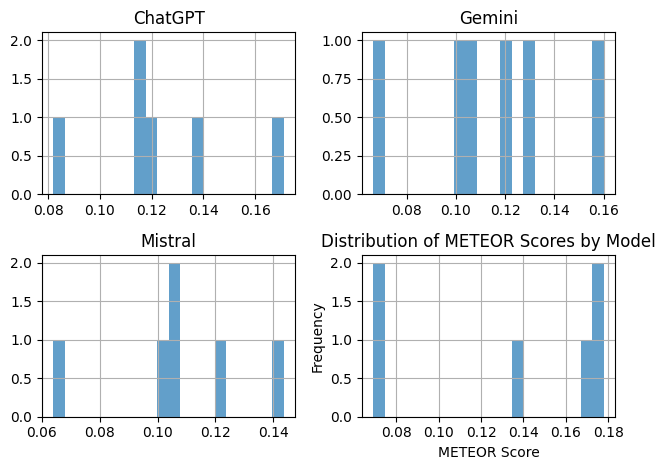

In [17]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Gujarati_sheet (1).csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#Tamil Score Calculation

In [18]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Tamil.csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.004140
Gemini      0.009407
Mistral     0.004052
Abhishek    0.006061
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.004140
1    Gemini  0.009407
2   Mistral  0.004052
3  Abhishek  0.006061

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.073527
Gemini      0.073480
Mistral     0.082330
Abhishek    0.104522
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.009192
Gemini      0.017586
Mistral     0.010474
Abhishek    0.019429
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.002000
Gemini      0.005422
Mistral     0.001527
Abhishek    0.003751
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.000360
Gemini      0.001836
Mistral     0.000426
Abhishek    0.000392
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.073527  0.009192  0.002000  0.000360
1    Gemini  0.073480  0.017586  0.005422  0.001836
2   Mistral  0.082330  0.010474

In [19]:
!pip install rouge

In [20]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Tamil.csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.104172
Gemini      0.131344
Mistral     0.130716
Abhishek    0.137265
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.010175
Gemini      0.027793
Mistral     0.013678
Abhishek    0.024394
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.099431
Gemini      0.127398
Mistral     0.124801
Abhishek    0.135517
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.104172  0.010175  0.099431
1    Gemini  0.131344  0.027793  0.127398
2   Mistral  0.130716  0.013678  0.124801
3  Abhishek  0.137265  0.024394  0.135517


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Average METEOR Scores:
ChatGPT     0.087970
Gemini      0.134163
Mistral     0.081302
Abhishek    0.121185
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.087970
1    Gemini  0.134163
2   Mistral  0.081302
3  Abhishek  0.121185
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

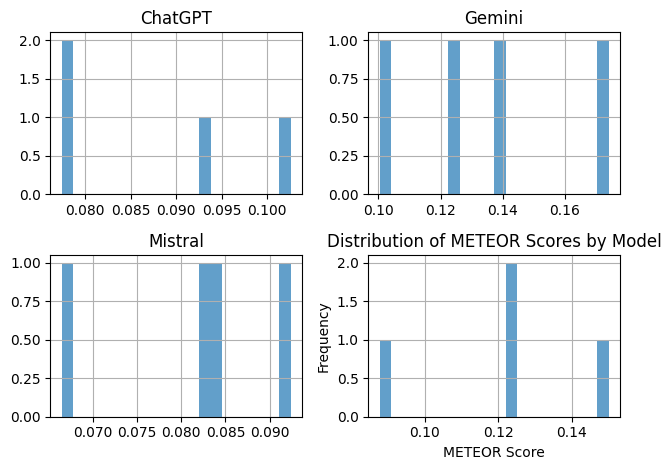

In [21]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Tamil.csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#Telugu Score Calculation

In [22]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - TELUGU.csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.002147
Gemini      0.002995
Mistral     0.002422
Abhishek    0.001048
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.002147
1    Gemini  0.002995
2   Mistral  0.002422
3  Abhishek  0.001048

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.079467
Gemini      0.062412
Mistral     0.047014
Abhishek    0.031587
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.007668
Gemini      0.008142
Mistral     0.007304
Abhishek    0.003524
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.000241
Gemini      0.001112
Mistral     0.000891
Abhishek    0.000105
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.000242
Gemini      0.000285
Mistral     0.000246
Abhishek    0.000106
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.079467  0.007668  0.000241  0.000242
1    Gemini  0.062412  0.008142  0.001112  0.000285
2   Mistral  0.047014  0.007304

In [23]:
!pip install rouge

In [24]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - TELUGU.csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.107613
Gemini      0.103442
Mistral     0.085155
Abhishek    0.092810
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.009062
Gemini      0.014944
Mistral     0.011450
Abhishek    0.010381
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.106997
Gemini      0.102478
Mistral     0.084102
Abhishek    0.086869
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.107613  0.009062  0.106997
1    Gemini  0.103442  0.014944  0.102478
2   Mistral  0.085155  0.011450  0.084102
3  Abhishek  0.092810  0.010381  0.086869


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Average METEOR Scores:
ChatGPT     0.059002
Gemini      0.052370
Mistral     0.036850
Abhishek    0.038072
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.059002
1    Gemini  0.052370
2   Mistral  0.036850
3  Abhishek  0.038072
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

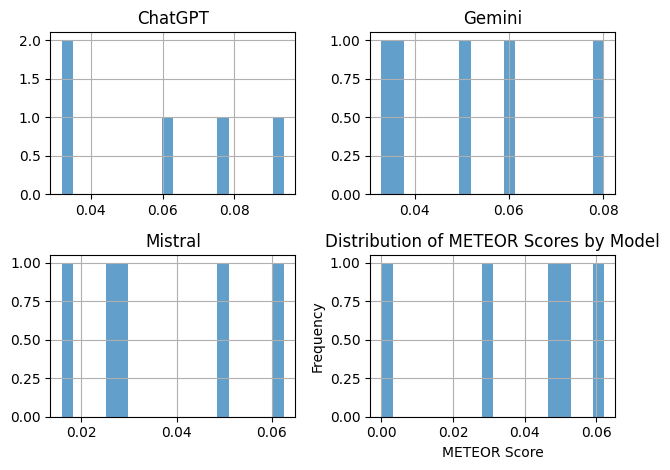

In [25]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - TELUGU.csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#Marathi Score Calculation

In [26]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - marathi_sheet (1).csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.000490
Gemini      0.000554
Mistral     0.001359
Abhishek    0.001373
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.000490
1    Gemini  0.000554
2   Mistral  0.001359
3  Abhishek  0.001373

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.046711
Gemini      0.032018
Mistral     0.089542
Abhishek    0.077732
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.000252
Gemini      0.000732
Mistral     0.002021
Abhishek    0.003801
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.000088
Gemini      0.000066
Mistral     0.000258
Abhishek    0.000113
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.000088
Gemini      0.000067
Mistral     0.000133
Abhishek    0.000113
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.046711  0.000252  0.000088  0.000088
1    Gemini  0.032018  0.000732  0.000066  0.000067
2   Mistral  0.089542  0.002021

In [27]:
!pip install rouge

In [28]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - marathi_sheet (1).csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.106007
Gemini      0.095735
Mistral     0.112896
Abhishek    0.116182
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.000441
Gemini      0.002434
Mistral     0.003633
Abhishek    0.006682
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.103508
Gemini      0.094501
Mistral     0.109537
Abhishek    0.115695
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.106007  0.000441  0.103508
1    Gemini  0.095735  0.002434  0.094501
2   Mistral  0.112896  0.003633  0.109537
3  Abhishek  0.116182  0.006682  0.115695


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Average METEOR Scores:
ChatGPT     0.042687
Gemini      0.037189
Mistral     0.052245
Abhishek    0.053283
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.042687
1    Gemini  0.037189
2   Mistral  0.052245
3  Abhishek  0.053283
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

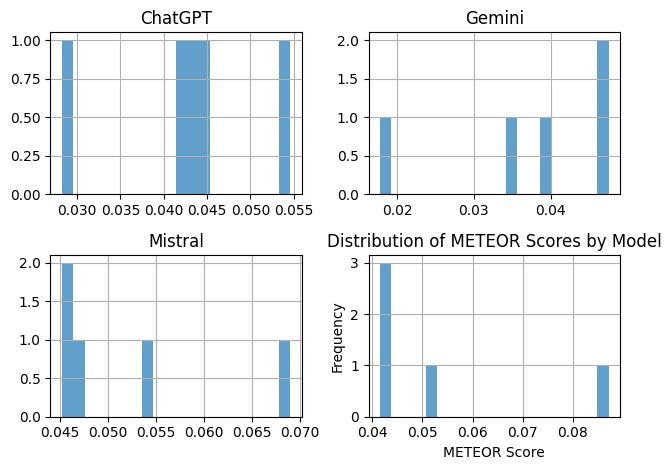

In [29]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - marathi_sheet (1).csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#Hindi Score Calculation

In [30]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Hindi.csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.030025
Gemini      0.039238
Mistral     0.039679
Abhishek    0.035669
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.030025
1    Gemini  0.039238
2   Mistral  0.039679
3  Abhishek  0.035669

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.147707
Gemini      0.153604
Mistral     0.182469
Abhishek    0.175251
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.047085
Gemini      0.061622
Mistral     0.061615
Abhishek    0.060140
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.018347
Gemini      0.027520
Mistral     0.023613
Abhishek    0.023277
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.006959
Gemini      0.011008
Mistral     0.011118
Abhishek    0.008415
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.147707  0.047085  0.018347  0.006959
1    Gemini  0.153604  0.061622  0.027520  0.011008
2   Mistral  0.182469  0.061615

In [31]:
!pip install rouge

In [32]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Hindi.csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.247076
Gemini      0.277211
Mistral     0.308249
Abhishek    0.296306
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.073966
Gemini      0.098918
Mistral     0.097078
Abhishek    0.094139
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.179175
Gemini      0.203770
Mistral     0.211814
Abhishek    0.192712
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.247076  0.073966  0.179175
1    Gemini  0.277211  0.098918  0.203770
2   Mistral  0.308249  0.097078  0.211814
3  Abhishek  0.296306  0.094139  0.192712


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Average METEOR Scores:
ChatGPT     0.213529
Gemini      0.237566
Mistral     0.240616
Abhishek    0.235741
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.213529
1    Gemini  0.237566
2   Mistral  0.240616
3  Abhishek  0.235741
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

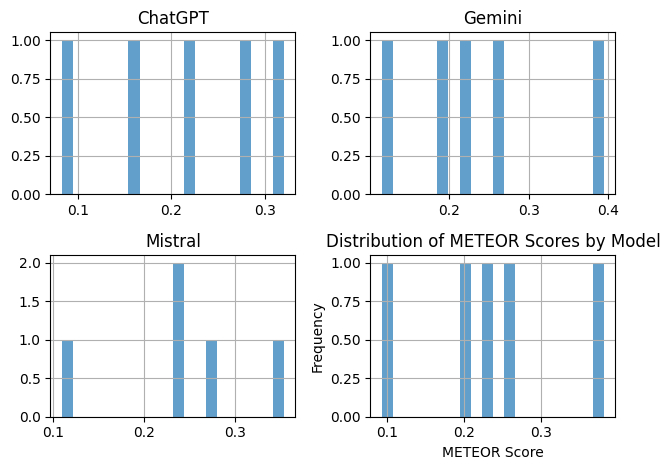

In [33]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Hindi.csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#Malyalam Score Calculation

In [34]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - MALYALAM.csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.001386
Gemini      0.002242
Mistral     0.001639
Abhishek    0.002023
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.001386
1    Gemini  0.002242
2   Mistral  0.001639
3  Abhishek  0.002023

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.047755
Gemini      0.046736
Mistral     0.043303
Abhishek    0.055170
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.002160
Gemini      0.004946
Mistral     0.003684
Abhishek    0.004586
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.000243
Gemini      0.001102
Mistral     0.000422
Abhishek    0.000742
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.000245
Gemini      0.000220
Mistral     0.000254
Abhishek    0.000230
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.047755  0.002160  0.000243  0.000245
1    Gemini  0.046736  0.004946  0.001102  0.000220
2   Mistral  0.043303  0.003684

In [35]:
!pip install rouge

In [36]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - MALYALAM.csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.089571
Gemini      0.094665
Mistral     0.065400
Abhishek    0.090792
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.003739
Gemini      0.012537
Mistral     0.006211
Abhishek    0.007494
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.087211
Gemini      0.090468
Mistral     0.065400
Abhishek    0.088639
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.089571  0.003739  0.087211
1    Gemini  0.094665  0.012537  0.090468
2   Mistral  0.065400  0.006211  0.065400
3  Abhishek  0.090792  0.007494  0.088639


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Average METEOR Scores:
ChatGPT     0.038560
Gemini      0.045480
Mistral     0.036809
Abhishek    0.044107
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.038560
1    Gemini  0.045480
2   Mistral  0.036809
3  Abhishek  0.044107
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

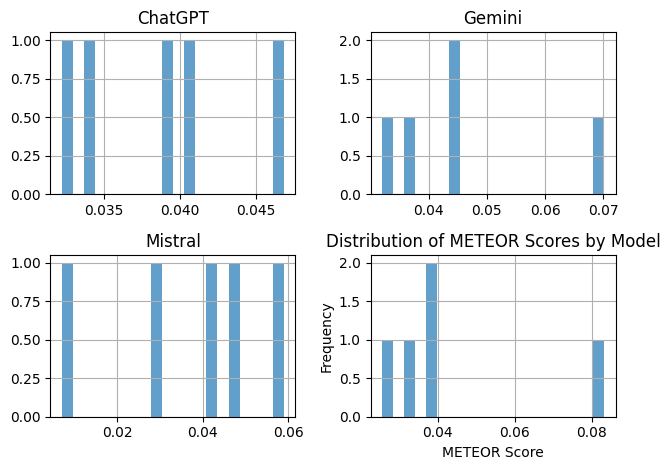

In [37]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - MALYALAM.csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#Bangla Score Calculation

In [38]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - bangla.csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.009837
Gemini      0.012383
Mistral     0.013520
Abhishek    0.019100
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.009837
1    Gemini  0.012383
2   Mistral  0.013520
3  Abhishek  0.019100

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.129204
Gemini      0.103144
Mistral     0.140790
Abhishek    0.124814
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.016559
Gemini      0.017908
Mistral     0.024726
Abhishek    0.027377
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.004472
Gemini      0.005906
Mistral     0.008652
Abhishek    0.011541
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.001679
Gemini      0.003149
Mistral     0.003465
Abhishek    0.004698
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.129204  0.016559  0.004472  0.001679
1    Gemini  0.103144  0.017908  0.005906  0.003149
2   Mistral  0.140790  0.024726

In [39]:
!pip install rouge

In [40]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - bangla.csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.170900
Gemini      0.186833
Mistral     0.165096
Abhishek    0.187522
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.021640
Gemini      0.030189
Mistral     0.030907
Abhishek    0.036278
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.112336
Gemini      0.119199
Mistral     0.096925
Abhishek    0.106482
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.170900  0.021640  0.112336
1    Gemini  0.186833  0.030189  0.119199
2   Mistral  0.165096  0.030907  0.096925
3  Abhishek  0.187522  0.036278  0.106482


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Average METEOR Scores:
ChatGPT     0.094318
Gemini      0.120042
Mistral     0.118655
Abhishek    0.124226
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.094318
1    Gemini  0.120042
2   Mistral  0.118655
3  Abhishek  0.124226
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

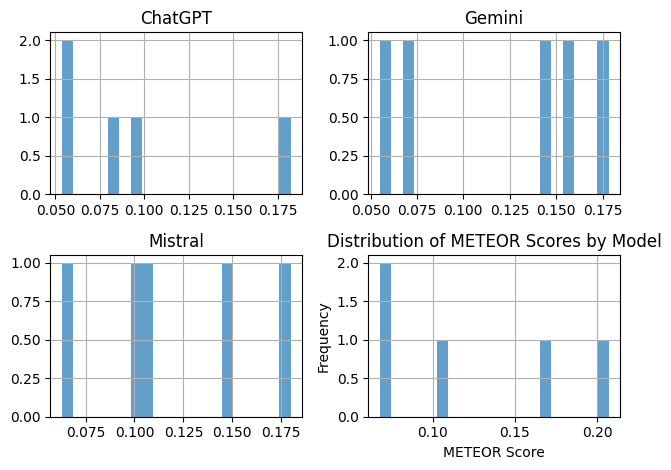

In [41]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - bangla.csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#Kannada Score Calculation

In [42]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - kannaada_sheet (1).csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

Average BLEU Scores:
ChatGPT     0.004193
Gemini      0.002546
Mistral     0.003199
Abhishek    0.005873
dtype: float64

BLEU Score Summary:
      Model      BLEU
0   ChatGPT  0.004193
1    Gemini  0.002546
2   Mistral  0.003199
3  Abhishek  0.005873

Average BLEU-1 Scores (Unigrams):
ChatGPT     0.144395
Gemini      0.081552
Mistral     0.116542
Abhishek    0.140215
dtype: float64

Average BLEU-2 Scores (Bigrams):
ChatGPT     0.012116
Gemini      0.008287
Mistral     0.009252
Abhishek    0.011738
dtype: float64

Average BLEU-3 Scores (Trigrams):
ChatGPT     0.000972
Gemini      0.000260
Mistral     0.000322
Abhishek    0.001751
dtype: float64

Average BLEU-4 Scores (4-grams):
ChatGPT     0.000316
Gemini      0.000262
Mistral     0.000324
Abhishek    0.000605
dtype: float64

BLEU n-gram Score Summary:
      Model    BLEU-1    BLEU-2    BLEU-3    BLEU-4
0   ChatGPT  0.144395  0.012116  0.000972  0.000316
1    Gemini  0.081552  0.008287  0.000260  0.000262
2   Mistral  0.116542  0.009252

In [43]:
!pip install rouge

In [44]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - kannaada_sheet (1).csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

Average ROUGE-1 F1 Scores:
ChatGPT     0.149224
Gemini      0.131180
Mistral     0.138345
Abhishek    0.158462
dtype: float64

Average ROUGE-2 F1 Scores:
ChatGPT     0.015483
Gemini      0.013639
Mistral     0.012753
Abhishek    0.013368
dtype: float64

Average ROUGE-L F1 Scores:
ChatGPT     0.145249
Gemini      0.125936
Mistral     0.129145
Abhishek    0.154742
dtype: float64

ROUGE Score Summary:
      Model   ROUGE-1   ROUGE-2   ROUGE-L
0   ChatGPT  0.149224  0.015483  0.145249
1    Gemini  0.131180  0.013639  0.125936
2   Mistral  0.138345  0.012753  0.129145
3  Abhishek  0.158462  0.013368  0.154742


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Average METEOR Scores:
ChatGPT     0.092226
Gemini      0.068021
Mistral     0.080699
Abhishek    0.087966
dtype: float64

METEOR Score Summary:
      Model    METEOR
0   ChatGPT  0.092226
1    Gemini  0.068021
2   Mistral  0.080699
3  Abhishek  0.087966
Score distribution plot saved as 'meteor_score_distribution.png'


<Figure size 1000x600 with 0 Axes>

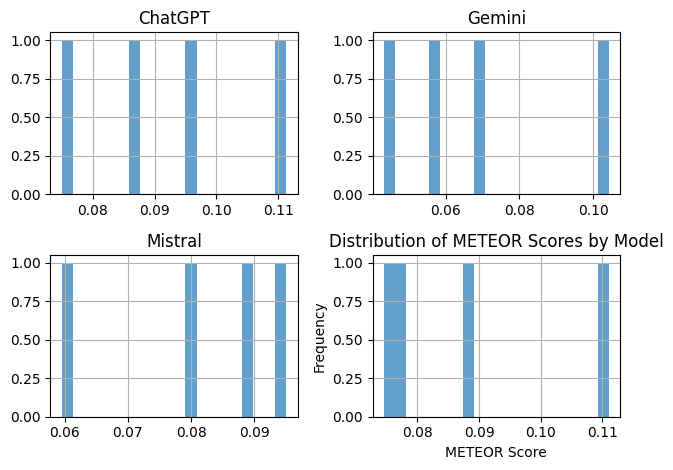

In [45]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - kannaada_sheet (1).csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")

#Urdu Score Calculation

In [ ]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Gujarati_sheet (1).csv")  # Replace with your actual file path

# Initialize BLEU score storage
bleu_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Initialize smoothing function for BLEU
smoothie = SmoothingFunction().method1

# Iterate over each row and compute BLEU scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    # Tokenize reference by splitting into words
    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Tokenize candidate
            candidate_tokens = candidate.lower().split()

            # Compute BLEU score with smoothing
            # Using weights for 1-gram, 2-gram, 3-gram, and 4-gram
            score = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0.25, 0.25, 0.25, 0.25),
                                  smoothing_function=smoothie)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store BLEU score
            bleu_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing BLEU score for row: {e}")
            continue

# Create DataFrame for BLEU scores
bleu_df = pd.DataFrame({model: scores for model, scores in bleu_scores.items()})

# Save BLEU scores
bleu_df.to_csv("bleu_scores.csv", index=False)

# Print average BLEU scores
print("Average BLEU Scores:")
print(bleu_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(bleu_scores.keys()),
    "BLEU": [sum(scores)/len(scores) if scores else 0 for model, scores in bleu_scores.items()]
})

# Save summary
summary_df.to_csv("bleu_summary.csv", index=False)
print("\nBLEU Score Summary:")
print(summary_df)

# You can also calculate BLEU-1, BLEU-2, BLEU-3, and BLEU-4 separately
bleu_n_scores = {
    "ChatGPT": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Gemini": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Mistral": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []},
    "Abhishek": {"bleu-1": [], "bleu-2": [], "bleu-3": [], "bleu-4": []}
}

# Recalculate for different n-gram weights
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    if len(reference.strip()) == 0:
        continue

    reference_tokens = [reference.lower().split()]

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        if len(candidate.strip()) == 0:
            continue

        try:
            candidate_tokens = candidate.lower().split()

            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # BLEU-1 (unigrams only)
            bleu_1 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(1, 0, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-1"].append(bleu_1)

            # BLEU-2 (bigrams only)
            bleu_2 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 1, 0, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-2"].append(bleu_2)

            # BLEU-3 (trigrams only)
            bleu_3 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 1, 0),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-3"].append(bleu_3)

            # BLEU-4 (4-grams only)
            bleu_4 = sentence_bleu(reference_tokens, candidate_tokens,
                                  weights=(0, 0, 0, 1),
                                  smoothing_function=smoothie)
            bleu_n_scores[model_name]["bleu-4"].append(bleu_4)

        except Exception as e:
            print(f"Error computing n-gram BLEU scores for row: {e}")
            continue

# Create DataFrames for each BLEU-n metric
bleu1_df = pd.DataFrame({model: scores["bleu-1"] for model, scores in bleu_n_scores.items()})
bleu2_df = pd.DataFrame({model: scores["bleu-2"] for model, scores in bleu_n_scores.items()})
bleu3_df = pd.DataFrame({model: scores["bleu-3"] for model, scores in bleu_n_scores.items()})
bleu4_df = pd.DataFrame({model: scores["bleu-4"] for model, scores in bleu_n_scores.items()})

# Save n-gram BLEU scores
bleu1_df.to_csv("bleu1_scores.csv", index=False)
bleu2_df.to_csv("bleu2_scores.csv", index=False)
bleu3_df.to_csv("bleu3_scores.csv", index=False)
bleu4_df.to_csv("bleu4_scores.csv", index=False)

# Print average n-gram BLEU scores
print("\nAverage BLEU-1 Scores (Unigrams):")
print(bleu1_df.mean())
print("\nAverage BLEU-2 Scores (Bigrams):")
print(bleu2_df.mean())
print("\nAverage BLEU-3 Scores (Trigrams):")
print(bleu3_df.mean())
print("\nAverage BLEU-4 Scores (4-grams):")
print(bleu4_df.mean())

# Create a combined n-gram summary DataFrame
ngram_summary_df = pd.DataFrame({
    "Model": list(bleu_n_scores.keys()),
    "BLEU-1": [sum(scores["bleu-1"])/len(scores["bleu-1"]) if scores["bleu-1"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-2": [sum(scores["bleu-2"])/len(scores["bleu-2"]) if scores["bleu-2"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-3": [sum(scores["bleu-3"])/len(scores["bleu-3"]) if scores["bleu-3"] else 0 for model, scores in bleu_n_scores.items()],
    "BLEU-4": [sum(scores["bleu-4"])/len(scores["bleu-4"]) if scores["bleu-4"] else 0 for model, scores in bleu_n_scores.items()]
})

# Save n-gram summary
ngram_summary_df.to_csv("bleu_ngram_summary.csv", index=False)
print("\nBLEU n-gram Score Summary:")
print(ngram_summary_df)

In [ ]:
!pip install rouge

In [ ]:
import pandas as pd
from rouge import Rouge

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Gujarati_sheet (1).csv")  # Replace with your actual file path

# Initialize ROUGE score storage with correct key names
rouge_scores = {
    "ChatGPT": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Gemini": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Mistral": {"rouge-1": [], "rouge-2": [], "rouge-l": []},
    "Abhishek": {"rouge-1": [], "rouge-2": [], "rouge-l": []}
}

# Initialize Rouge calculator
rouge = Rouge()

# Iterate over each row and compute ROUGE scores
for _, row in df.iterrows():
    reference = str(row["reference_answer"])

    # Skip empty references
    if len(reference.strip()) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model])

        # Skip empty candidates
        if len(candidate.strip()) == 0:
            continue

        try:
            # Compute ROUGE scores
            scores = rouge.get_scores(candidate, reference)[0]

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store ROUGE scores
            rouge_scores[model_name]["rouge-1"].append(scores["rouge-1"]["f"])
            rouge_scores[model_name]["rouge-2"].append(scores["rouge-2"]["f"])
            rouge_scores[model_name]["rouge-l"].append(scores["rouge-l"]["f"])

        except Exception as e:
            print(f"Error computing ROUGE score for row: {e}")
            continue

# Create DataFrames for each ROUGE metric
rouge1_df = pd.DataFrame({model: scores["rouge-1"] for model, scores in rouge_scores.items()})
rouge2_df = pd.DataFrame({model: scores["rouge-2"] for model, scores in rouge_scores.items()})
rougeL_df = pd.DataFrame({model: scores["rouge-l"] for model, scores in rouge_scores.items()})

# Save ROUGE scores
rouge1_df.to_csv("rouge1_scores.csv", index=False)
rouge2_df.to_csv("rouge2_scores.csv", index=False)
rougeL_df.to_csv("rougeL_scores.csv", index=False)

# Print average ROUGE scores
print("Average ROUGE-1 F1 Scores:")
print(rouge1_df.mean())
print("\nAverage ROUGE-2 F1 Scores:")
print(rouge2_df.mean())
print("\nAverage ROUGE-L F1 Scores:")
print(rougeL_df.mean())

# Create a combined summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(rouge_scores.keys()),
    "ROUGE-1": [sum(scores["rouge-1"])/len(scores["rouge-1"]) if scores["rouge-1"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-2": [sum(scores["rouge-2"])/len(scores["rouge-2"]) if scores["rouge-2"] else 0 for model, scores in rouge_scores.items()],
    "ROUGE-L": [sum(scores["rouge-l"])/len(scores["rouge-l"]) if scores["rouge-l"] else 0 for model, scores in rouge_scores.items()]
})

# Save summary
summary_df.to_csv("rouge_summary.csv", index=False)
print("\nROUGE Score Summary:")
print(summary_df)

In [ ]:
import pandas as pd
import nltk
from nltk.translate.meteor_score import meteor_score

# Download necessary NLTK resources (only need to run once)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the CSV file
df = pd.read_csv("/content/response_sheet - Gujarati_sheet (1).csv")  # Replace with your actual file path

# Initialize METEOR score storage with correct key names
meteor_scores = {
    "ChatGPT": [],
    "Gemini": [],
    "Mistral": [],
    "Abhishek": []
}

# Iterate over each row and compute METEOR scores
for idx, row in df.iterrows():
    reference = str(row["reference_answer"]).split()  # Tokenize reference

    # Skip empty references
    if len(reference) == 0:
        continue

    for model in ["answer_model_chatgpt", "answer_model_gemini", "answer_model_mistral", "answer_model_abhishek"]:
        candidate = str(row[model]).split()  # Tokenize model response

        # Skip empty candidates
        if len(candidate) == 0:
            continue

        try:
            # Compute METEOR score - convert lists to proper format
            score = meteor_score([reference], candidate)

            # Map model name to dictionary key
            model_name = model.replace("answer_model_", "").title()
            if model_name == "Chatgpt":
                model_name = "ChatGPT"

            # Store METEOR score
            meteor_scores[model_name].append(score)

        except Exception as e:
            print(f"Error computing METEOR score for row {idx}: {e}")
            print(f"Reference: {reference}")
            print(f"Candidate: {candidate}")
            continue

# Create DataFrame for METEOR scores
meteor_df = pd.DataFrame(meteor_scores)

# Save METEOR scores
meteor_df.to_csv("meteor_scores.csv", index=False)

# Print average METEOR scores
print("Average METEOR Scores:")
print(meteor_df.mean())

# Create a summary DataFrame
summary_df = pd.DataFrame({
    "Model": list(meteor_scores.keys()),
    "METEOR": [sum(scores)/len(scores) if scores else 0 for model, scores in meteor_scores.items()]
})

# Save summary
summary_df.to_csv("meteor_summary.csv", index=False)
print("\nMETEOR Score Summary:")
print(summary_df)

# Optional: Create a histogram plot of METEOR scores
try:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    meteor_df.hist(bins=20, alpha=0.7)
    plt.title('Distribution of METEOR Scores by Model')
    plt.xlabel('METEOR Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('meteor_score_distribution.png')
    print("Score distribution plot saved as 'meteor_score_distribution.png'")
except ImportError:
    print("Matplotlib not available - skipping visualization")